# Deep Learning - Project 2
**Nina Żukowska 148278**
**Antoni Solarski 148270**

In [1]:
import time

from sklearn.model_selection import train_test_split

from utils import *

# PART 2

---
#### 11) Training with different batch sizes (e.g. 1, 16, 32, number_of_samples)

In [2]:
random.seed(23)

# download and preprocess data
download_data_if_not_exists()
N_CLASSES = 15
CLASSES, MIN_SAMPLE = choose_biggest_classes(DATA_DIR, N_CLASSES)
IMAGES, LABELS = load_data(DATA_DIR, CLASSES, MIN_SAMPLE)
X, MEAN, STD = standardize_images(resize_images(IMAGES))
y, labels_enc, labels_ohe = one_hot_encoding_for_labels(LABELS)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((913, 200, 300, 3), (392, 200, 300, 3), (913, 15), (392, 15))

In [3]:
# train and evaluate model
def batch_size_experiment(batch_size):
    model = get_model(N_CLASSES)
    start_time = time.time()
    history = train_model(model, X_train, y_train, X_test, y_test, 50, batch_size)
    end_time = time.time()
    _, accuracy = model.evaluate(X_test, y_test)
    return model, history, accuracy, end_time - start_time

In [4]:
# train for each batch size
BATCH_SIZES = (1, 16, 32, len(X_train))
results = {bs: batch_size_experiment(bs) for bs in BATCH_SIZES}

Epoch 1/50
913/913 [==============================] - 153s 167ms/step - loss: 2.7355 - accuracy: 0.0438 - val_loss: 2.7081 - val_accuracy: 0.0663
Epoch 2/50
913/913 [==============================] - 152s 166ms/step - loss: 2.7121 - accuracy: 0.0460 - val_loss: 2.7082 - val_accuracy: 0.0663
Epoch 3/50
913/913 [==============================] - 151s 166ms/step - loss: 2.7108 - accuracy: 0.0646 - val_loss: 2.7054 - val_accuracy: 0.0536
Epoch 4/50
913/913 [==============================] - 151s 166ms/step - loss: 2.7082 - accuracy: 0.0646 - val_loss: 2.6783 - val_accuracy: 0.1097
Epoch 5/50
913/913 [==============================] - 151s 166ms/step - loss: 2.6985 - accuracy: 0.0898 - val_loss: 2.6223 - val_accuracy: 0.1173
Epoch 6/50
913/913 [==============================] - 151s 166ms/step - loss: 2.6046 - accuracy: 0.1030 - val_loss: 2.5948 - val_accuracy: 0.1378
Epoch 7/50
913/913 [==============================] - 151s 165ms/step - loss: 2.5886 - accuracy: 0.1161 - val_loss: 2.5379 -

Training with batch sizes 1 took 5471.647973537445.
Obtained accuracy: 0.5586734414100647


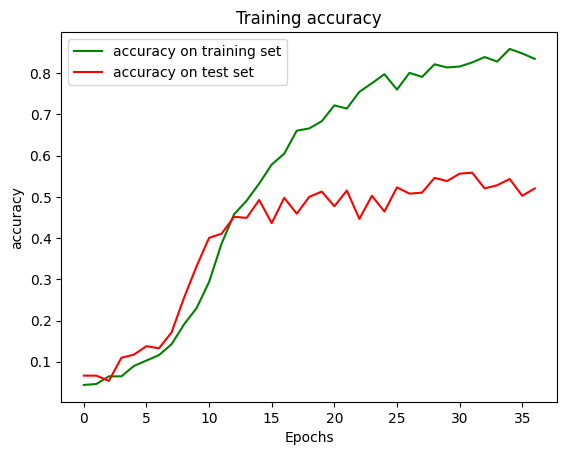

Training with batch sizes 16 took 1118.4551277160645.
Obtained accuracy: 0.7270408272743225


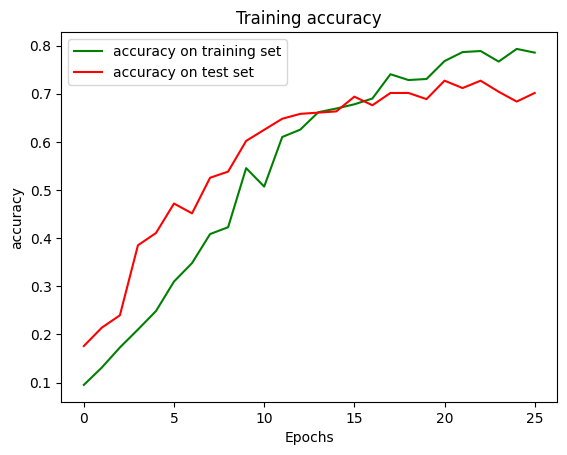

Training with batch sizes 32 took 1067.6884207725525.
Obtained accuracy: 0.7372449040412903


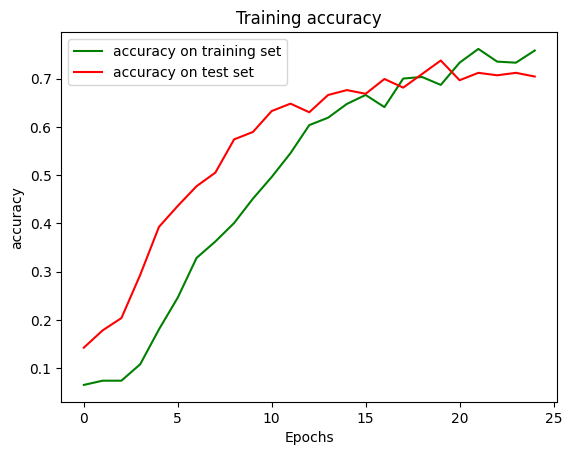

Training with batch sizes 913 took 497.5023365020752.
Obtained accuracy: 0.1301020383834839


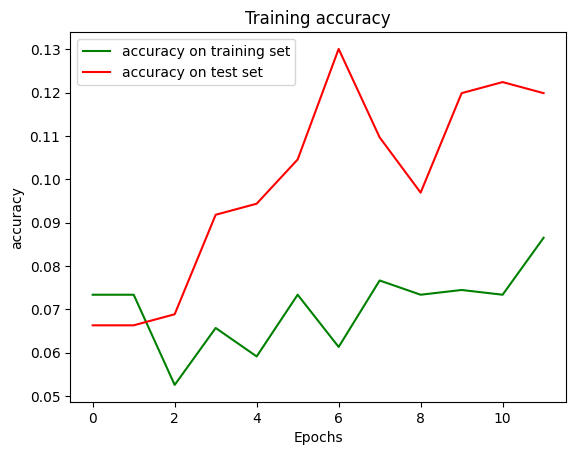

In [5]:
# print model evaluation metrics and training metrics
for batch_size, (m, h, acc, t) in results.items():
    print(f'Training with batch sizes {batch_size} took {t}.')
    print(f'Obtained accuracy: {acc}')
    plot_metrics_from_model_history(h, 'accuracy')

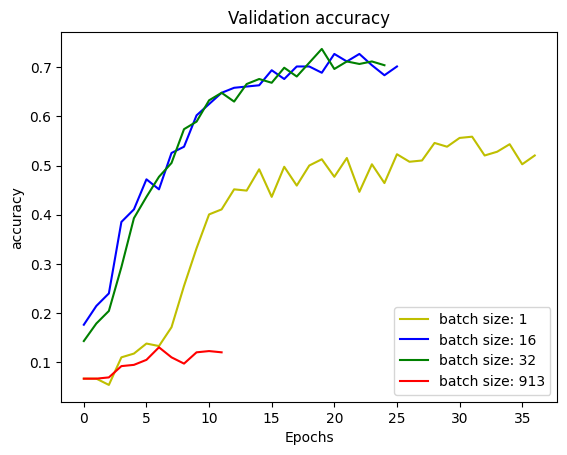

In [7]:
for (batch_size, (m, h, acc, t)), color in zip(results.items(), ['y', 'b', 'g', 'r']):
    plt.plot(h.epoch, h.history['val_accuracy'], color, label=f'batch size: {batch_size}')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

##### Results discussion